In [40]:
import pandas as pd
import urllib.parse
import re
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df = pd.read_csv("clean_data.csv")

In [42]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64', 'bool']
df_houses = df[df['Type of property'] == 'house']
df_apartments = df[df['Type of property'] == 'apartment']
apartdf = df_apartments.select_dtypes(include=numerics)
noIdApartDf = apartdf.loc[:, ~apartdf.columns.isin(['id', 'Zip', 'Surface of the land', 'Terrace', 'Garden', 'Swimming pool', 'Garden surface', 'Terrace surface', 'Number of facades'])]
noIdApartDf.corr(method = 'spearman')

,Price,Price of square meter,Building Cond. values,Number of rooms,Living area,Furnished,Kitchen values,Primary energy consumption,Energy efficiency,Open fire
Price,1.000000,0.616502,0.194172,0.524020,0.641100,-0.000981,0.253054,-0.269952,0.104770,0.095388
Price of square meter,0.616502,1.000000,0.194030,-0.012985,-0.100120,0.193289,0.206269,-0.192631,0.111778,0.026084
Building Cond. values,0.194172,0.194030,1.000000,0.034507,0.068314,0.061409,0.335104,-0.064506,0.155468,-0.002691
Number of rooms,0.524020,-0.012985,0.034507,1.000000,0.750287,-0.095922,0.078524,-0.055602,0.045463,0.074217
Living area,0.641100,-0.100120,0.068314,0.750287,1.000000,-0.183962,0.143069,-0.152125,0.022676,0.111555
Furnished,-0.000981,0.193289,0.061409,-0.095922,-0.183962,1.000000,0.010828,0.053870,0.030454,-0.027389
Kitchen values,0.253054,0.206269,0.335104,0.078524,0.143069,0.010828,1.000000,-0.108972,0.077217,0.014572
Primary energy consumption,-0.269952,-0.192631,-0.064506,-0.055602,-0.152125,0.053870,-0.108972,1.000000,0.031393,0.016680
Energy efficiency,0.104770,0.111778,0.155468,0.045463,0.022676,0.030454,0.077217,0.031393,1.000000,0.001285
Open fire,0.095388,0.026084,-0.002691,0.074217,0.111555,-0.027389,0.014572,0.016680,0.001285,1.000000


In [43]:
housedf = df_houses.select_dtypes(include=numerics)
noIdHouseDf = housedf.loc[:, ~housedf.columns.isin(['id', 'Zip', 'Terrace', 'Garden'])]
noIdHouseDf.corr(method = 'spearman')

,Price,Price of square meter,Building Cond. values,Number of facades,Number of rooms,Living area,Furnished,Kitchen values,Surface of the land,Primary energy consumption,Energy efficiency,Terrace surface,Garden surface,Open fire,Swimming pool
Price,1.000000,0.664400,0.267317,0.303484,0.526919,0.708811,0.009590,0.190946,0.421041,-0.332577,0.263089,0.191072,0.106911,0.188644,0.260953
Price of square meter,0.664400,1.000000,0.256205,0.202991,0.093620,0.017212,0.042563,0.207709,0.167991,-0.243325,0.210549,0.145421,0.080205,0.094521,0.178552
Building Cond. values,0.267317,0.256205,1.000000,0.068958,0.080063,0.138196,0.031727,0.289956,0.033731,-0.312065,0.339124,0.227849,0.078100,0.025335,0.133699
Number of facades,0.303484,0.202991,0.068958,1.000000,0.130046,0.229320,0.002399,0.064878,0.722604,0.041344,-0.006318,0.148873,0.207808,0.198667,0.215351
Number of rooms,0.526919,0.093620,0.080063,0.130046,1.000000,0.653311,0.008830,0.061367,0.254589,-0.141007,0.156036,0.134974,0.097264,0.100298,0.158345
Living area,0.708811,0.017212,0.138196,0.229320,0.653311,1.000000,-0.010263,0.087594,0.419429,-0.214579,0.160315,0.143786,0.076299,0.166876,0.222062
Furnished,0.009590,0.042563,0.031727,0.002399,0.008830,-0.010263,1.000000,0.026043,-0.018284,-0.016620,-0.008925,0.013092,0.006633,-0.012361,0.036687
Kitchen values,0.190946,0.207709,0.289956,0.064878,0.061367,0.087594,0.026043,1.000000,0.039304,-0.129546,0.147445,0.237402,0.084786,0.032264,0.114586
Surface of the land,0.421041,0.167991,0.033731,0.722604,0.254589,0.419429,-0.018284,0.039304,1.000000,0.038587,-0.002434,0.168991,0.344383,0.200504,0.253196
Primary energy consumption,-0.332577,-0.243325,-0.312065,0.041344,-0.141007,-0.214579,-0.016620,-0.129546,0.038587,1.000000,-0.520198,-0.143081,0.021707,-0.039269,-0.104210


In [44]:
corr_matrix_houses = noIdHouseDf.corr(method='spearman')
corr_matrix_apart = noIdApartDf.corr(method = 'spearman')

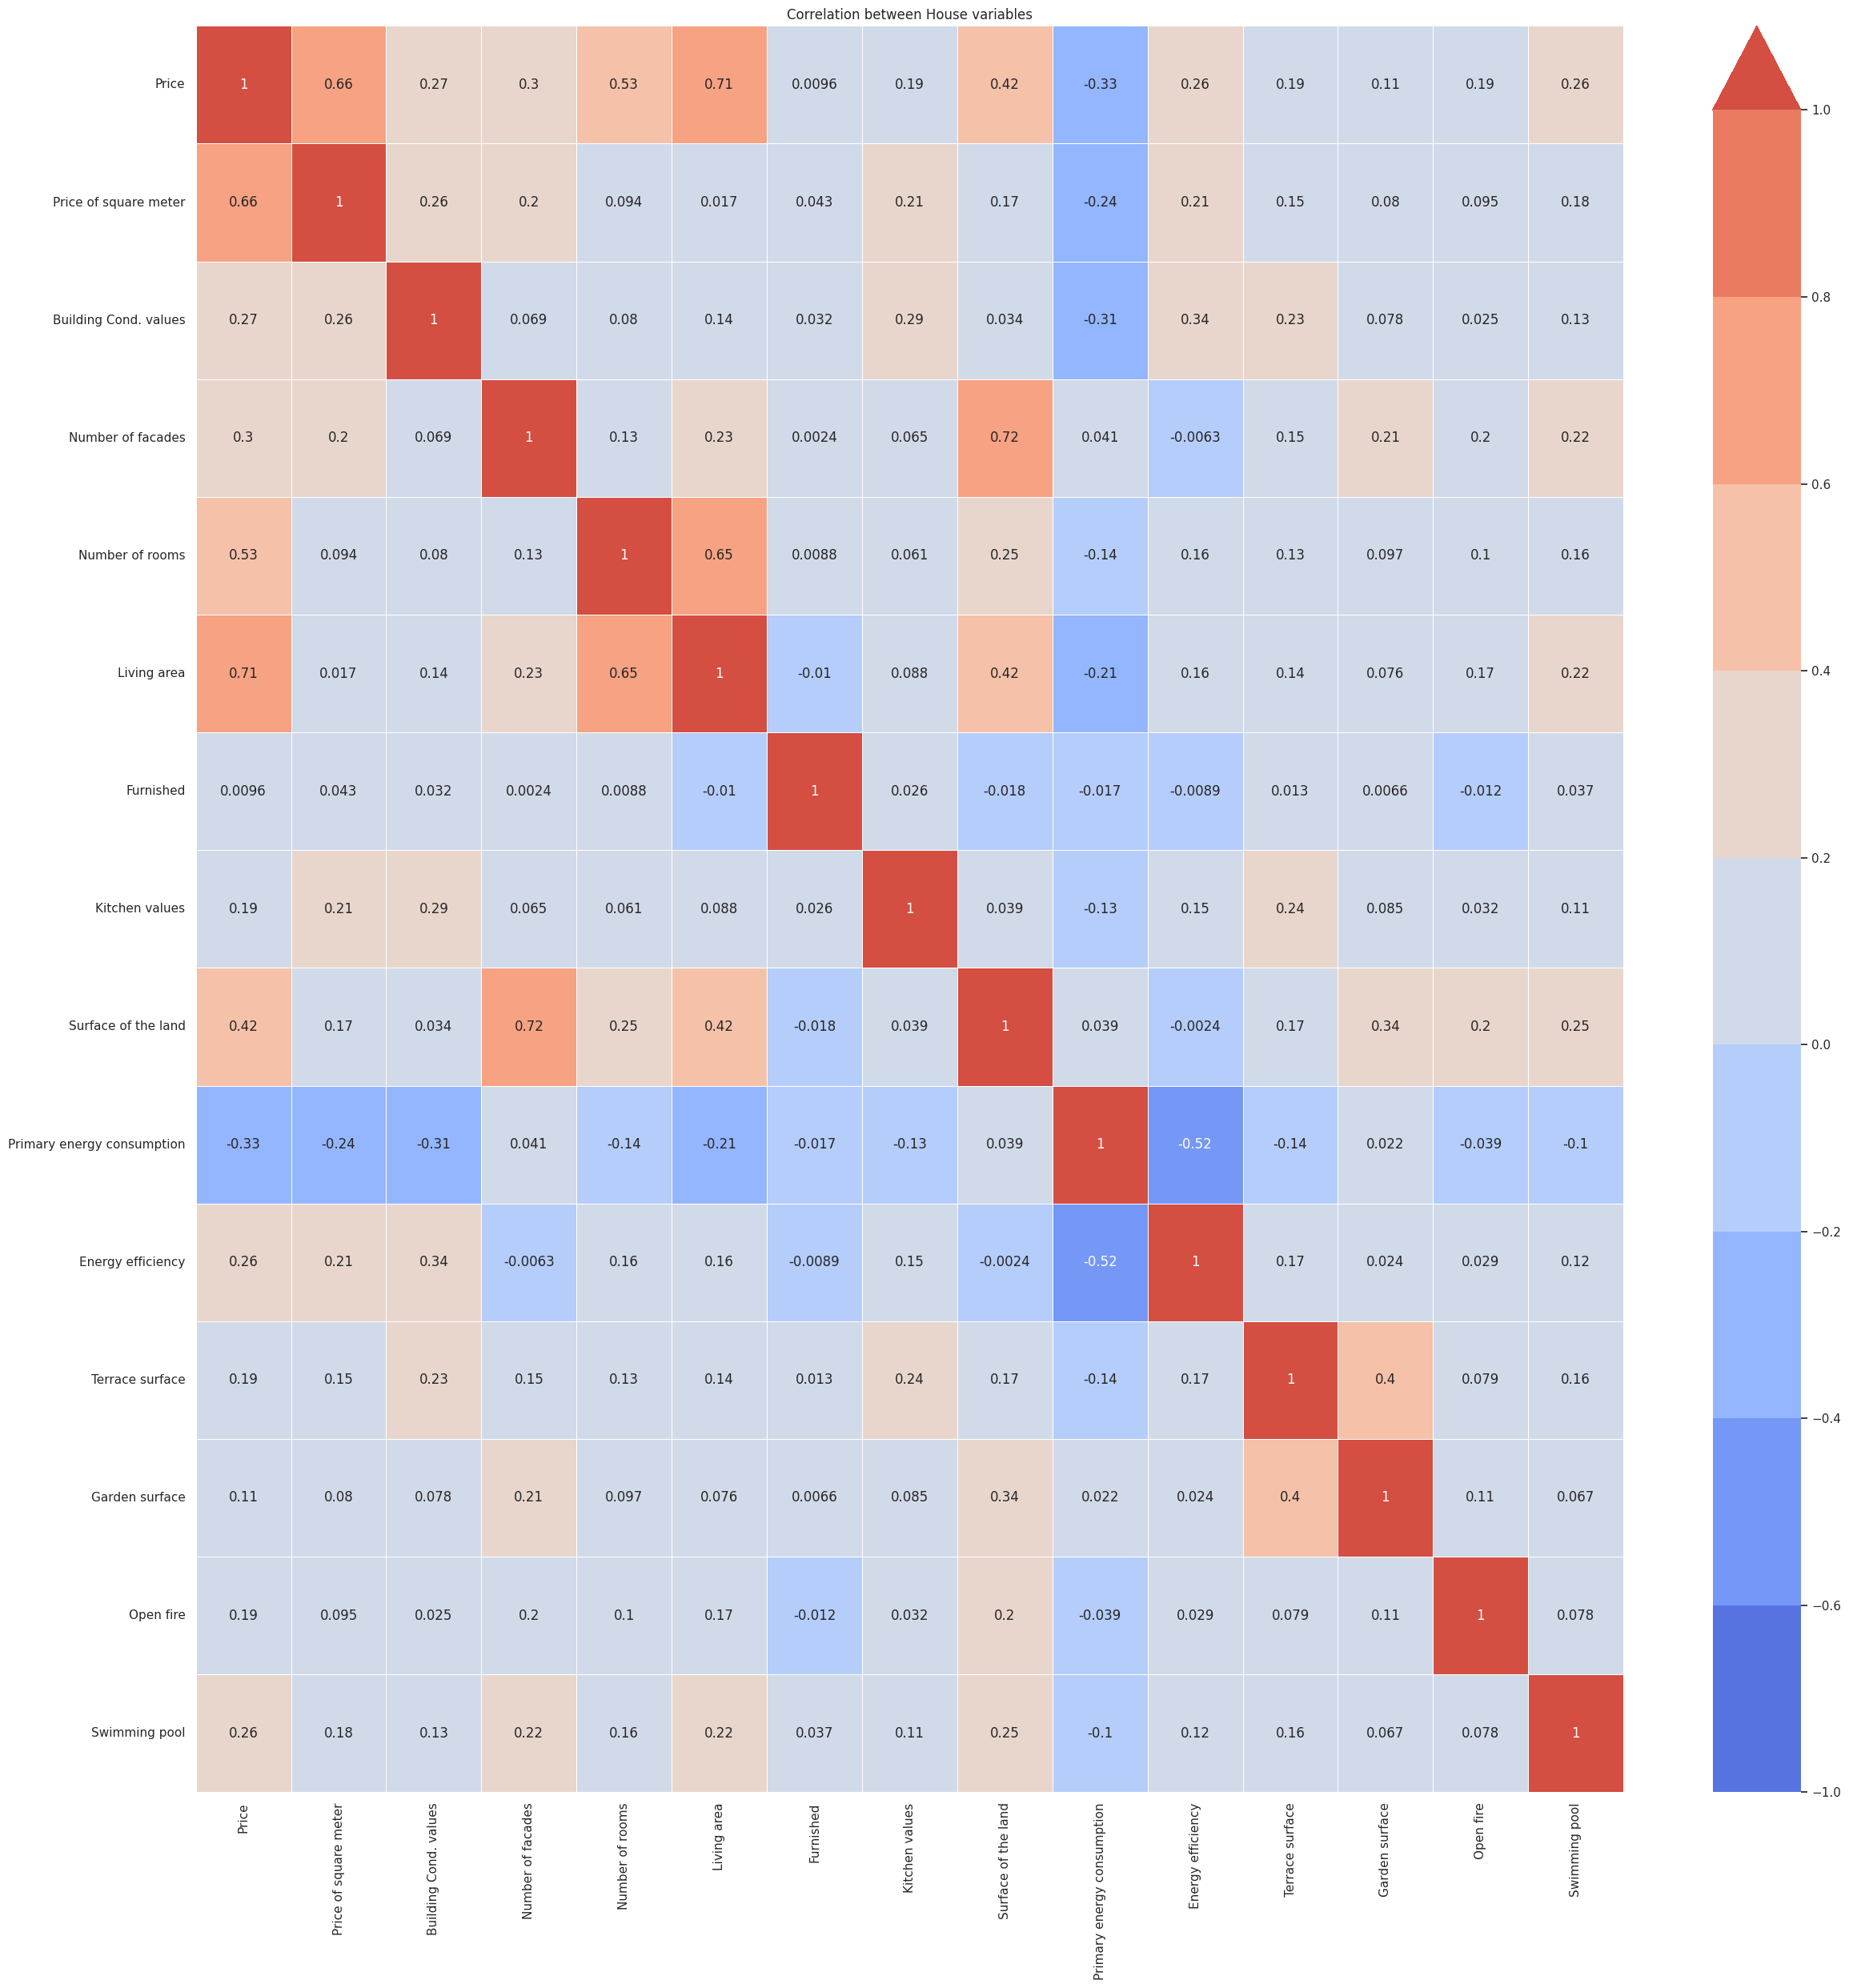

In [45]:
colors = sns.color_palette('coolwarm', 10)
levels = [-1.0, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
cmap, norm = matplotlib.colors.from_levels_and_colors(levels, colors, extend="max")
sns.heatmap(corr_matrix_houses, cmap = cmap, annot=True, linewidths=.5, norm=norm)
plt.title('Correlation between House variables')
sns.set (rc = {'figure.figsize':(25, 25)})
plt.show()

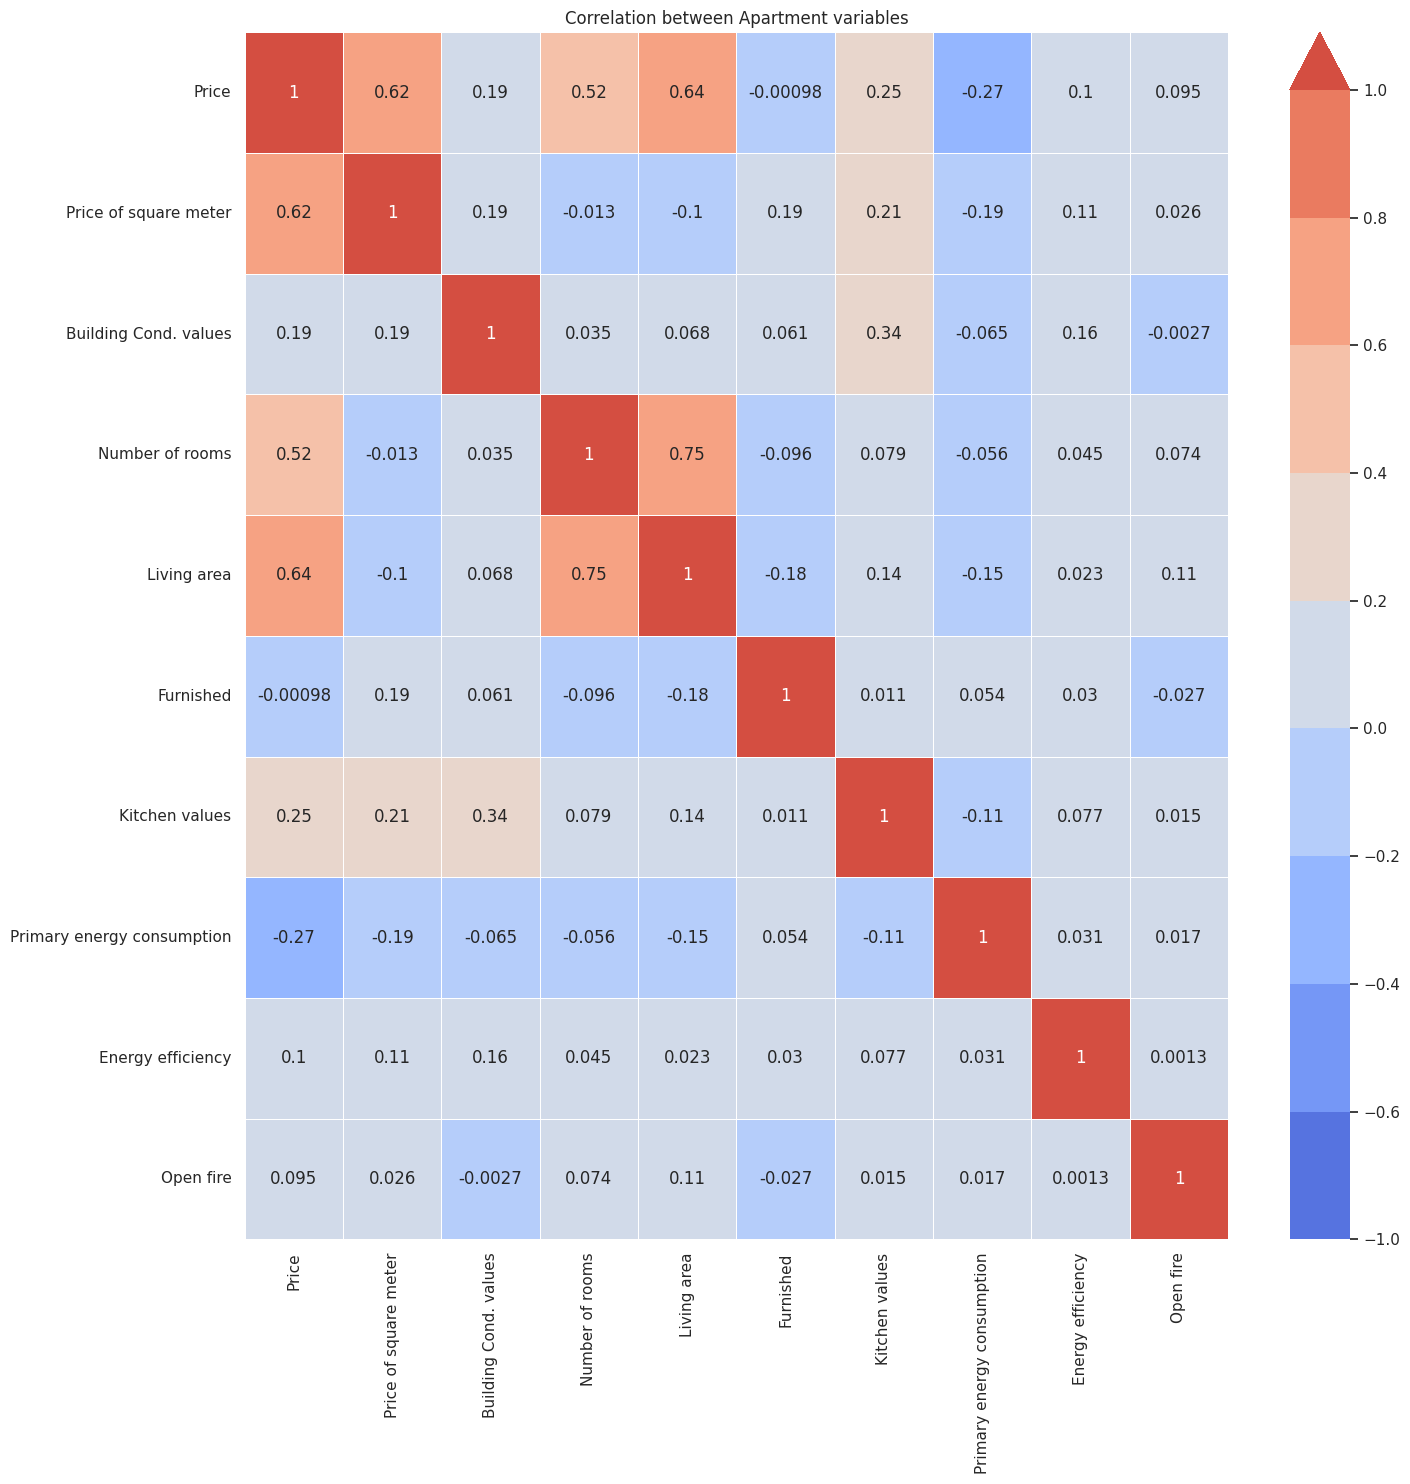

In [52]:
colors = sns.color_palette('coolwarm', 10)
levels = [-1.0, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
cmap, norm = matplotlib.colors.from_levels_and_colors(levels, colors, extend="max")
sns.heatmap(corr_matrix_apart, cmap = cmap, annot=True, linewidths=.5, norm=norm)
plt.title('Correlation between Apartment variables')
sns.set (rc = {'figure.figsize':(10, 10)})
plt.show()

Which variables would you delete and why ?

# 1) For houses : delete the garden and terrace.
# Why : We keep the surface variables because the percentage of missing values for these elements is negligible

# 2) For apartments : delete the garden, terrace and swimming pool.
# same explaination as above for garden and terrace, as for the swimming pool, apartments 
# never have one.

Represent the number of properties according to their surface using a histogram.

# histogram

In your opinion, which 5 variables are the most important and why?

# 1) For houses

# Price
# Living area
# Number of rooms
# Surface of the land
# Primary energy consumption


# Why : Because the correlation between price and these 5 variables is significant enough to 
# influence the average buyer.


What are the most expensive municipalities in Belgium? (Average price, median price, price per square meter)



What are the most expensive municipalities in Wallonia? (Average price, median price, price per square meter)

What are the most expensive municipalities in Flanders? (Average price, median price, price per square meter)

What are the less expensive municipalities in Belgium? (Average price, median price, price per square meter)

What are the less expensive municipalities in Wallonia? (Average price, median price, price per square meter)

What are the less expensive municipalities in Flanders? (Average price, median price, price per square meter)

number of rooms on price (houses, apartments)

Plot on Price per sqm

Energy effeciency on Price

Subtype of houses on Price

Building condition on price


In [47]:
# Which variables have the greatest influence on the price?


In [48]:
# Which variables have the least influence on the price?


In [49]:
# How many qualitative and quantitative variables are there? How would you transform these values into numerical values?


In [50]:
# Percentage of missing values per column?
